# Отчёт по лабораторной работе "Экстремум функции нескольких перемнных"

### Выполнил: Безруков Андрей
### Группа: 427

### Цель: Найти минимум следующей функции методом покоординатного спуска, в окрестности токи минимума оценить овражность, построить линии уровня и траекторию поиска.

$f(x_1,x_2)=(x_1-2)^2+2*x_2^2+5.5$ *(1)*
*при* $[x_1^0=0,x_2^0=2]$

In [1]:
using PyPlot
f(x)=(x[1]-2)^2+2*x[2]^2+5.5
x0=[0,2]
n=length(x0)

2

#### Используем метод скользящего окна для поиска отрезка унимодальности ближайшего к заданной точке.
*Для выбранной исходной точки $x^0$ и выбраного окна шириной
$2h>0$ около точки $x^0$ проверяктся условие унимодальности:  
$f(x^0−h)>f(x^0)<f(x^0+h)$.  
Если условие выполнено, то интервал унимодальности найден, в противном случае проверяется условие:  
$f(x^0−h)>f(x^0+h)$.  
Если последнее выполнено, тогда $x=x+h/2$.
В противном случае $x=x−h/2$.*


In [2]:
function skolokno(x00, k1)
    h=zeros(length(x00))
    h[k1]=0.01
    while(!(f(x00-h)>f(x00) && f(x00)<f(x00+h)))
        if(f(x00-h)>f(x00+h))
            x00=x00+h/2
        else
            x00=x00-h/2
            end
    end
    return ab=[x00-h, x00+h]
end

skolokno (generic function with 1 method)

#### Используем метод золотого сечения для одномерной минимизации и найдем шаг $\alpha_k$.
*Разобъем отрезок неопределенности на две части. При этом отношение длины всего отрезка к большей части равно отношению большей части к меньшей и равно числу $\tau=(1+\sqrt{5})/2 ≃ 1.6118$ ($\tau$ - "золотое сечение"). В методе золотого сечения точки $x^1$ и $x^2$ на каждом отрезке неопределенности $[a,b]$ выбираются по правилу:  
$x^1=b−(b−a)/\tau$, $x^2 = a + (b−a)/\tau.$  
Шаг найдем как $\alpha_k=x^0-x_{min}$.*

In [3]:
E=0.001
function gsech(x00, k1)
    ab=skolokno(x00, k1)
    a=ab[1][k1]
    b=ab[2][k1]
    t=1.6118
    while(abs(b-a)<E)
        x11=[b-(b-a)/t,a+(b-a)/t]
        if(f(x11[1])>=f(x11[2]))
            a=x11[1]
        else
            b=x11[2]
        end
    end
    x00=0.5*(a+b)
    return alf=x00-x0[k1]
end

gsech (generic function with 1 method)

#### Найдем параметр $p^k$.
*$p^k=e_{k−[k/n]n+1}$ , $k=0,1,2,...$, где $[t]$-целая часть числа $t$, $e_j = {0,...,0,1,0,...,0}$ (единица стоит
на $j$-ом месте), $j=1,...,n$.*

In [4]:
function pk(x00, k1)
    p=zeros(length(x00))
    p[k1]=1
    return p
end

function norm(vec)
    nn=0
    for i=1:length(vec)
        nn+=vec[i]^2
    end
    return sqrt(nn)
end
n=length(x0)
function t(k)
    return (k-div(k,n)*n+1)
end

t (generic function with 1 method)

#### Метод покоординатного спуска.
*Используем формулу $x^k+1 = x^k + α_kp^k$ подставив в нее найденые ранее значения.  
Погрешность $\varepsilon=0.001$.*

In [5]:
k=1
xx=Array{Float64}(0)
yy=Array{Float64}(0)
while(true)
    push!(xx,x0[1])
    push!(yy,x0[2])
    x1=x0+gsech(x0, t(k))*pk(x0, t(k))
    if(norm(x0-x1) < E)
        println("Minimum point: ",x1)
        println("Minimum of the function: ",f(x1))
        println("Number of iterations: ",k-1)
        break    
    else
        x0 = x1
        k+=1
    end 
end

Minimum point: [2.0, 2.04281e-14]
Minimum of the function: 5.5
Number of iterations: 2


*Построим линии уровня и траекторию поиска минимума.*

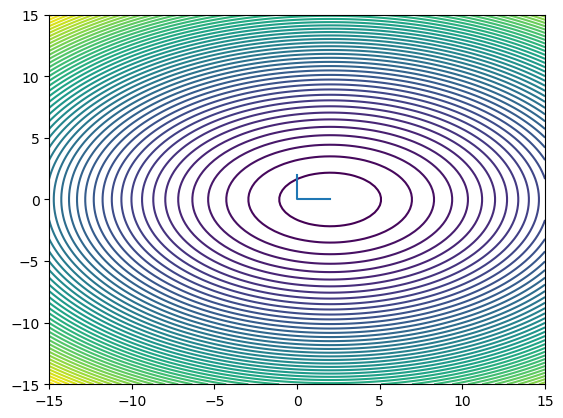

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000026F61668>

In [6]:
f(x,y)=(x-2).^2+2*y.^2+5.5
n=100
x=linspace(-15,15,n)
y=linspace(-15,15,n)
xgrid=repmat(x',n,1)
ygrid=repmat(y,1,n)
z=zeros(n,n)
z=f(xgrid,ygrid)
contour(xgrid,ygrid,z,50)
plot(xx,yy)

#### Найдем овражность.
*Теперь оценим овражность функции в окрестности минимума. По определению, под показателем овражности $\theta$ функции $f$ в окрестности точки минимума подразумевают отношение наибольшего собственного числа матрицы Гессе $\nabla$$^2f$ к наименьшему.* 

In [8]:
Ges=[2 0;0 4]
D=((Ges[1,1]+Ges[2,2])^2)-4*(Ges[1,1]*Ges[2,2]-Ges[1,2]+Ges[2,1])
if (D>0)
    lyam1=((Ges[1,1]+Ges[2,2])+sqrt(D))/2
    lyam2=((Ges[1,1]+Ges[2,2])-sqrt(D))/2
    max=lyam1
    min=lyam2
    
    if (lyam2>max)
        max=lyam2
        min=lyam1
    end
    k=max/min
     println("Ovrag=",k)
end

Ovrag=2.0


### Вывод:  Найден минимум с начальной точкой [0,2] за 2 итерации.